# AWS Rekognition Face

Detects the faces in an image and their characteristics. The results are printed and overlayed onto the original image.

<a href="https://aws.amazon.com/documentation/rekognition/">AWS Rekognition Documentation</a>

In [1]:
import boto3
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
def aws_face(image):
    """Function that sends cell image to AWS Rekognition for
    facial recognition. Overlays bounding boxes of detected
    faces onto original image and prints analytics."""    
    client = boto3.client('rekognition', 'eu-west-1')
    
    with open(image, 'rb') as img:
        response = client.detect_faces(Image={'Bytes': img.read()},
                                       Attributes=['ALL'])
    
    img = Image.open(image)
    ax = plt.imshow(img)
    for i, faceDetail in enumerate(response['FaceDetails']):
        width, height, left, top = faceDetail['BoundingBox'].values()
        width, left = width * img.width, left * img.width
        height, top = height * img.height, top * img.height
        ul = (left, top)
        ur = (left + width, top)
        lr = (left + width, top + height)
        ll = (left, top + height)
        vertices = [ul, ur, lr, ll]
        patch = Polygon(vertices, closed=True, fill=False,
                        linewidth=3, color='cyan')
        ax.axes.add_patch(patch)
        plt.text(ul[0], ul[1], i, color='cyan', fontsize=18)
        plt.axis('off')
    plt.show()
    
    print('Faces in ' + image + ':')    
    for i, faceDetail in enumerate(response['FaceDetails']):
        print('\tFace %s:' % i)
        print('\t\tAge range? {} - {}'.format(
            faceDetail['AgeRange']['Low'], faceDetail['AgeRange']['High']))
        print('\t\tSmiling? {} ({:.2f}% confident)'.format(
            faceDetail['Smile']['Value'], faceDetail['Smile']['Confidence']))
        print('\t\tEyelasses? {} ({:.2f}% confident)'.format(
            faceDetail['Eyeglasses']['Value'], faceDetail['Eyeglasses']['Confidence']))
        print('\t\tSunglasses? {} ({:.2f}% confident)'.format(
            faceDetail['Sunglasses']['Value'], faceDetail['Sunglasses']['Confidence']))
        print('\t\tGender? {} ({:.2f}% confident)'.format(
            faceDetail['Gender']['Value'], faceDetail['Gender']['Confidence']))
        print('\t\tBeard? {} ({:.2f}% confident)'.format(
            faceDetail['Beard']['Value'], faceDetail['Beard']['Confidence']))
        print('\t\tMustache? {} ({:.2f}% confident)'.format(
            faceDetail['Mustache']['Value'], faceDetail['Mustache']['Confidence']))
        print('\t\tEyes open? {} ({:.2f}% confident)'.format(
            faceDetail['EyesOpen']['Value'], faceDetail['EyesOpen']['Confidence']))
        print('\t\tMouth open? {} ({:.2f}% confident)'.format(
            faceDetail['MouthOpen']['Value'], faceDetail['MouthOpen']['Confidence']))
        print('\t\tEmotions?')
        for emotion in faceDetail['Emotions']:
            print('\t\t\t{} ({:.2f}%)'.format(
                emotion['Type'], emotion['Confidence']))
    
    return response

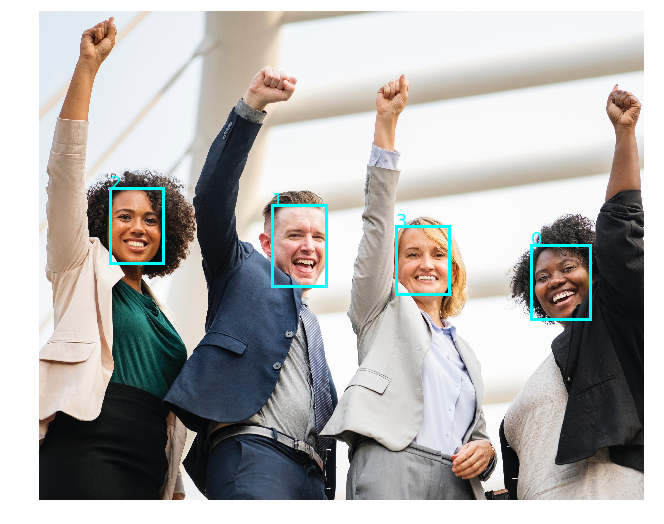

Faces in group.jpg:
	Face 0:
		Age range? 35 - 52
		Smiling? True (100.00% confident)
		Eyelasses? False (99.87% confident)
		Sunglasses? False (99.98% confident)
		Gender? Female (99.90% confident)
		Beard? False (99.92% confident)
		Mustache? False (99.96% confident)
		Eyes open? True (99.99% confident)
		Mouth open? True (100.00% confident)
		Emotions?
			ANGRY (0.01%)
			SAD (0.00%)
			SURPRISED (0.42%)
			HAPPY (99.56%)
			CONFUSED (0.00%)
			CALM (0.00%)
			DISGUSTED (0.00%)
	Face 1:
		Age range? 26 - 43
		Smiling? True (99.96% confident)
		Eyelasses? False (100.00% confident)
		Sunglasses? False (100.00% confident)
		Gender? Male (97.04% confident)
		Beard? False (83.84% confident)
		Mustache? False (99.84% confident)
		Eyes open? False (94.57% confident)
		Mouth open? True (99.99% confident)
		Emotions?
			ANGRY (0.83%)
			SAD (2.78%)
			CALM (0.03%)
			HAPPY (94.24%)
			SURPRISED (0.07%)
			DISGUSTED (1.84%)
			CONFUSED (0.00%)
	Face 2:
		Age range? 26 - 43
		Smiling? True (10

In [4]:
img = 'group.jpg'
result = aws_face(img)